<a href="https://colab.research.google.com/github/Jueunkim429/Cloud-cloud/blob/main/CNN_CloudCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install libarchive-c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 54.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.8 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102740 sha256=7d4bea243d9e416949280be94fce7151df5447a42892f6f84c3f10e3cff788a2
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [3]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from PIL import Image
import os, glob, numpy as np
import os
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import set_session as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.preprocessing.image import ImageDataGenerator
import libarchive
import pydot
import cartopy

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow.keras
print(tensorflow.keras.__version__)

2.12.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image를 학습데이터로 변환

In [8]:
img_dir =  "/content/drive/MyDrive/Colab Notebooks/clouddata/train14" #학습데이터로 변환할 데이터 위치
categories = os.listdir(img_dir)
num_classes = len(categories)

image_w = 64  #64*64*3 사이즈로 조정
image_h = 64

pixel=  image_w * image_h * 3
X=[]
y=[]

for idx, cat in enumerate(categories): # 카테고리를 enumerate를 이용하여 카테고리와 인덱스 사용
    img_dir_detail = img_dir + '/' + cat
    files = glob.glob(img_dir_detail + "/*.jpg")
    for i,f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert('RGB')
            img = img.resize((image_w,image_h)) #이미지의 사이즈를 조정
            data = np.asarray(img)
            X.append(data)
            y.append(idx)
            if i % 300 == 0 : # 300번 마다 프린트
                print(cat, " : ", f)
        except:
            print(cat,str(i)," 번째에서 에러")

X = np.array(X)  #array로 변환
y = np.array(y)  #array로 변환

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) #train test 구분

Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N156_0_135.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N149_0_9394.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N159_0_3662.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N227_0_6095.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N027_0_1818.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N063_0_5104.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N111_0_4797.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_0_626.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_0_8064.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_0_4888.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/Cb-N022.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/c

## 학습데이터 가공

In [9]:
print(X_train.shape) # 데이터 크기 확인
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# img를 array로 변환시 0~255의 값을 가지는데 이것을 0~1로 변환
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

from keras.utils import to_categorical
# 기존의 1의 값을가지는 y값을 [0,1,0,0,---]와 같이 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(12846, 64, 64, 3)
(12846,)
(5506, 64, 64, 3)
(5506,)


## 모델 구축

### model 1

In [10]:
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model'
    model_path = model_dir + "/cloud_classify.model"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [ ]:
model.summary()

In [ ]:
X_train.shape
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

In [12]:
print("정확도 : %.2f" %(model.evaluate(X_test, y_test)[1]))

173/173 [==============================] - 1s 4ms/step - loss: 0.6093 - accuracy: 0.8939
정확도 : 0.89


In [13]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9248
평균 손실: 0.2022
평균 검증 정확도: 0.8751
평균 검증 손실: 0.4714


### model 2

In [26]:
with tf.device('/device:GPU:0'):
    model2 = Sequential()

    model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(num_classes, activation = 'softmax'))

    model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

    model_dir = './model2'
    model_path = model_dir + "/cloud_classify.model2"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)


In [ ]:
model2.summary()

In [ ]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

In [29]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9374
평균 손실: 0.1741
평균 검증 정확도: 0.9075
평균 검증 손실: 0.3257


### model2 + normalization = model3

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):

    model3 = Sequential()

    model3.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(64, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Flatten())
    model3.add(Dense(256, activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(num_classes, activation='softmax'))

    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model3'
    model_path = model_dir + "/cloud_classify.model3"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [ ]:
model3.summary()

In [ ]:
history = model3.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

In [139]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])
print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9416
평균 손실: 0.0458
평균 검증 정확도: 0.8747
평균 검증 손실: 1.6677


In [125]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9836
평균 손실: 0.0458
평균 검증 정확도: 0.8747
평균 검증 손실: 1.6677


### model1 + normalization = model4

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler

# 모델 구성
#scaler = StandardScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)
model4 = Sequential()

model4.add(Conv2D(32, (3,3), padding="same", input_shape=(image_w, image_h, 3), activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './model4'
model_path = model_dir + "/cloud_classify.model4"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [ ]:
model4.summary()

In [ ]:
X_train.shape
history = model4.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

In [142]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9389
평균 손실: 0.1619
평균 검증 정확도: 0.8858
평균 검증 손실: 0.3250


#### normalization 다르게 진행 =model41

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

model41 = Sequential()

model41.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model41.add(BatchNormalization())
model41.add(MaxPooling2D(pool_size=(2,2)))
model41.add(Dropout(0.25))

model41.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model41.add(BatchNormalization())
model41.add(MaxPooling2D(pool_size=(2,2)))
model41.add(Dropout(0.25))

model41.add(Flatten())
model41.add(Dense(256, activation='relu'))
model41.add(Dropout(0.5))
model41.add(Dense(num_classes, activation='softmax'))

model41.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './model41'
model_path = model_dir + "/cloud_classify.model41"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [ ]:
model41.summary()

In [ ]:
X_train.shape
history = model41.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

In [38]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8267
평균 손실: 0.4594
평균 검증 정확도: 0.7811
평균 검증 손실: 0.8311


### model1+RMSprop = model5

In [39]:
from tensorflow.keras.optimizers import RMSprop
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model5 = Sequential()

    model5.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Dropout(0.25))

    model5.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Dropout(0.25))

    model5.add(Flatten())
    model5.add(Dense(256, activation='relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model5.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

    model_dir = './model5'
    model_path = model_dir + "/cloud_classify.model5"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model5.summary()

In [ ]:
X_train.shape
history = model5.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

In [42]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9094
평균 손실: 0.2824
평균 검증 정확도: 0.8589
평균 검증 손실: 0.4924


### model2+RMSprop = model6

In [43]:
with tf.device('/device:GPU:0'):
    model6 = Sequential()

    model6.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model6.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Flatten())
    model6.add(Dense(256, activation = 'relu'))
    model6.add(Dropout(0.5))
    model6.add(Dense(num_classes, activation = 'softmax'))

    model6.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop',metrics=['accuracy'])

    model_dir = './model6'
    model_path = model_dir + "/cloud_classify.model6"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [ ]:
model6.summary()

In [ ]:
history = model6.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

In [46]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.7489
평균 손실: 0.8097
평균 검증 정확도: 0.7351
평균 검증 손실: 0.8215


### model1+Adamax = model7

In [47]:
from tensorflow.keras.optimizers import Adamax
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model7 = Sequential()

    model7.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model7.add(MaxPooling2D(pool_size=(2,2)))
    model7.add(Dropout(0.25))

    model7.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model7.add(MaxPooling2D(pool_size=(2,2)))
    model7.add(Dropout(0.25))

    model7.add(Flatten())
    model7.add(Dense(256, activation='relu'))
    model7.add(Dropout(0.5))
    model7.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model7.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    model_dir = './model7'
    model_path = model_dir + "/cloud_classify.model7"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model7.summary()

In [ ]:
X_train.shape
history = model7.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

In [50]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9163
평균 손실: 0.2267
평균 검증 정확도: 0.8751
평균 검증 손실: 0.3816


### model2+Adamax model8

In [51]:
from tensorflow.keras.optimizers import Adamax

with tf.device('/device:GPU:0'):
    model8 = Sequential()

    model8.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model8.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Flatten())
    model8.add(Dense(256, activation = 'relu'))
    model8.add(Dropout(0.5))
    model8.add(Dense(num_classes, activation = 'softmax'))

    model8.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax',metrics=['accuracy'])

    model_dir = './model8'
    model_path = model_dir + "/cloud_classify.model8"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [ ]:
model8.summary()

In [ ]:
history = model8.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

In [54]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9411
평균 손실: 0.1574
평균 검증 정확도: 0.9111
평균 검증 손실: 0.3018


### model1+Adamax+normalization = mode9

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adamax

# 모델 구성
model9 = Sequential()

model9.add(Conv2D(32, (3,3), padding="same", input_shape=(image_w, image_h, 3), activation="relu"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))

model9.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))

model9.add(Flatten())
model9.add(Dense(256, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax',metrics=['accuracy'])

model_dir = './model9'
model_path = model_dir + "/cloud_classify.model9"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model9.summary()

In [ ]:
X_train.shape
history = model9.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

In [58]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9216
평균 손실: 0.2100
평균 검증 정확도: 0.8559
평균 검증 손실: 0.5569


### model2+Adamax+normalization = mode10

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
tf.config.run_functions_eagerly(True)

with tf.device('/device:GPU:0'):
    model10 = Sequential()

    model10.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Conv2D(64, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Conv2D(128, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(Conv2D(128, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Flatten())
    model10.add(Dense(256, activation='relu'))
    model10.add(Dropout(0.5))
    model10.add(Dense(num_classes, activation='softmax'))

    model10.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    model_dir = './model10'
    model_path = model_dir + "/cloud_classify.model10"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [147]:
model10.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_26 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_52 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 64)      

In [148]:
history = model10.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
362/362 [==============================] - 30s 83ms/step - loss: 1.5183 - accuracy: 0.4567 - val_loss: 1.5280 - val_accuracy: 0.2949
Epoch 2/100
362/362 [==============================] - 30s 83ms/step - loss: 1.1872 - accuracy: 0.5313 - val_loss: 1.1432 - val_accuracy: 0.5362
Epoch 3/100
362/362 [==============================] - 30s 84ms/step - loss: 1.0954 - accuracy: 0.5721 - val_loss: 1.0557 - val_accuracy: 0.5961
Epoch 4/100
362/362 [==============================] - 30s 82ms/step - loss: 1.0417 - accuracy: 0.5992 - val_loss: 0.9948 - val_accuracy: 0.6031
Epoch 5/100
362/362 [==============================] - 30s 83ms/step - loss: 0.9780 - accuracy: 0.6268 - val_loss: 0.9008 - val_accuracy: 0.6576
Epoch 6/100
362/362 [==============================] - 30s 84ms/step - loss: 0.9156 - accuracy: 0.6480 - val_loss: 0.8396 - val_accuracy: 0.6763
Epoch 7/100
362/362 [==============================] - 30s 84ms/step - loss: 0.8586 - accuracy: 0.6742 - val_loss: 1.0963 - val_ac

In [156]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9802
평균 손실: 0.0525
평균 검증 정확도: 0.9378
평균 검증 손실: 0.2821


## test

### test data로 비교

In [ ]:
from keras.models import load_model

path = "/content/drive/MyDrive/Colab Notebooks/clouddata/test/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train14") #train위치

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model10.predict(X)

file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1

### 직접 찍은 data로 비교

In [153]:
def weather (label) :
  if label == "Cc" :
    print("눈꺼풀 구름입니다.")
    print("단일한 선 모양입니다.")
    print("날씨에 큰 영향을 미치지 않는 구름입니다.")
  elif label == "Cb" :
    print("눈구름입니다.")
    print("세포 형태의 구름입니다.")
    print("번개, 천둥, 강한 바람과 폭우가 내릴 수 있습니다. 외출을 자제해주세요!")
  elif label == "Ns" :
    print("적란운입니다.")
    print("수직 형태의 구름입니다.")
    print("비, 이슬비가 내릴 수 있습니다. 우산을 챙겨 외출해주세요!")
  elif label == "Sc" :
    print("층운입니다.")
    print("둥글고 조각난 모양의 구름입니다.")
    print("안정된 날씨에 발생하는 구름입니다. 마음놓고 외출하셔도 좋습니다!")
  elif label == "St" :
    print("적운입니다.")
    print("평평하고 수평으로 퍼진 모양의 구름입니다.")
    print("약한 강수나 가벼운 이슬비가 내릴 수 있습니다. 흐림과 안개를 동반합니다. 우산을 챙겨 외출해주세요!")

1/1 [==============================] - 0s 47ms/step
////////////////////


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


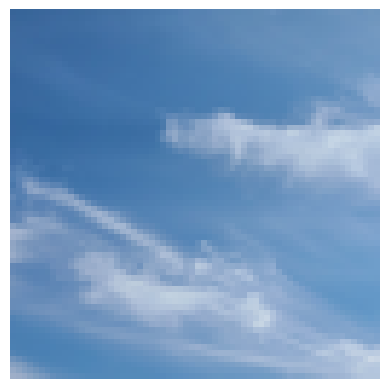

눈꺼풀 구름입니다.
단일한 선 모양입니다.
날씨에 큰 영향을 미치지 않는 구름입니다.
cloud2.jpg의 예측되는 구름종류 : Cc
////////////////////


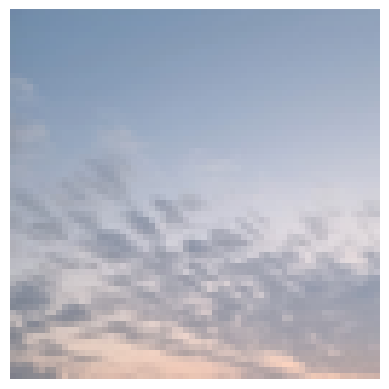

층운입니다.
둥글고 조각난 모양의 구름입니다.
안정된 날씨에 발생하는 구름입니다. 마음놓고 외출하셔도 좋습니다!
cloud1.jpg의 예측되는 구름종류 : Sc
////////////////////


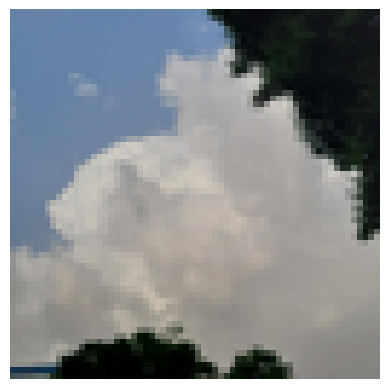

눈구름입니다.
세포 형태의 구름입니다.
번개, 천둥, 강한 바람과 폭우가 내릴 수 있습니다. 외출을 자제해주세요!
cloud5.jpg의 예측되는 구름종류 : Cb
////////////////////


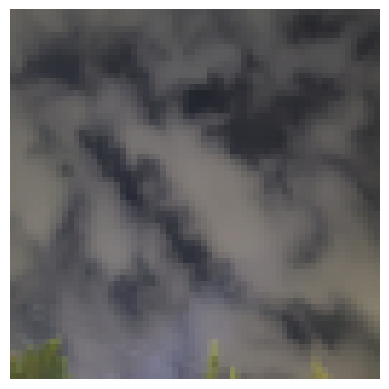

적운입니다.
평평하고 수평으로 퍼진 모양의 구름입니다.
약한 강수나 가벼운 이슬비가 내릴 수 있습니다. 흐림과 안개를 동반합니다. 우산을 챙겨 외출해주세요!
cloud4.jpg의 예측되는 구름종류 : St
////////////////////


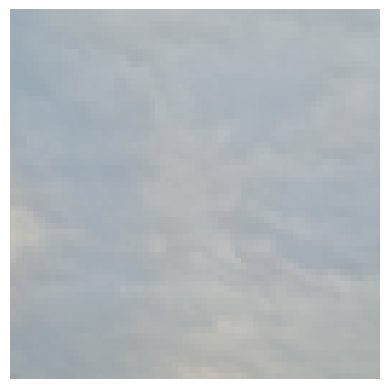

적란운입니다.
수직 형태의 구름입니다.
비, 이슬비가 내릴 수 있습니다. 우산을 챙겨 외출해주세요!
cloud3.jpg의 예측되는 구름종류 : Ns


In [155]:
from keras.models import load_model

path2 = "/content/drive/MyDrive/Colab Notebooks/myclouddata/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train14")

image_w = 64
image_h = 64

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path2+"/*.*")

for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model8.predict(X)

file_index = 0
k=0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    #사진 나타내기
    plt.imshow(X[k])
    plt.axis('off')
    plt.show()
    # 날씨 예측
    weather(category[label])
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1
    k=k+1